<a href="https://colab.research.google.com/github/pavanireddy1244/AIML-PROJECT-2320040085/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

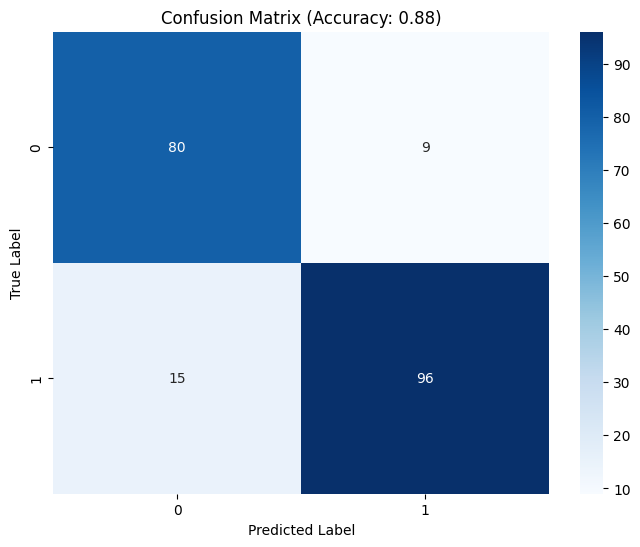

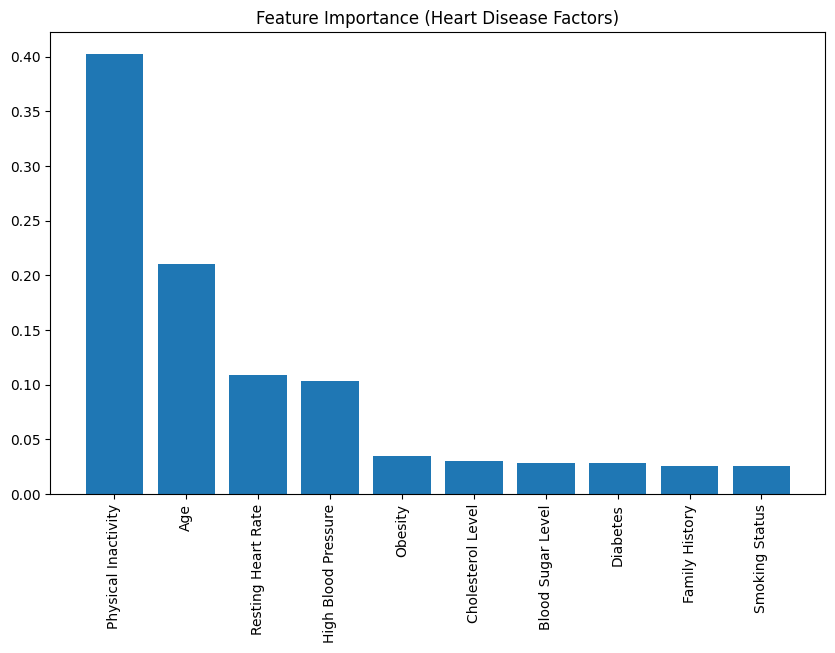

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Sample data generation for demonstration
# Normally, you'd load your actual cardiovascular dataset here
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# List of heart disease-related conditions as features
disease_features = [
    'High Blood Pressure', 'Cholesterol Level', 'Age', 'Smoking Status',
    'Diabetes', 'Obesity', 'Physical Inactivity', 'Family History',
    'Resting Heart Rate', 'Blood Sugar Level'
]

df = pd.DataFrame(X, columns=disease_features)
df['target'] = y

# Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_output.png')
plt.show()

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [disease_features[i] for i in indices], rotation=90)
plt.title('Feature Importance (Heart Disease Factors)')
plt.savefig('feature_importance_output.png')
plt.show()

# Print classification report
print(report)
